# **CNN for CIFAR-10**

The dataset is comprised of 60,000 32×32 pixel color photographs of objects from 10 classes, such as frogs, birds, cats, ships, etc. The class labels and their standard associated integer values are listed below.

Cifar10 classes:

- 0 : airplane
- 1 : automobile
- 2 : bird
- 3 : cat
- 4 : deer
- 5 : dog
- 6 : frog
- 7 : horse
- 8 : ship
- 9 : truck

**Importing Data**

In [1]:
from tensorflow.keras import datasets

(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()

170508288/170498071 [==============================] - 3s 0us/step


**Pre-Processing the Data**

In [19]:
x_train.shape, y_train.shape

((50000, 32, 32, 3), (50000, 1))

In [20]:
x_test.shape, y_test.shape

((10000, 32, 32, 3), (10000, 1))

In [21]:
train_images =x_train.astype('float32')/255
test_images=x_test.astype('float32')/255

In [22]:
from tensorflow.keras.utils import to_categorical

train_labels=to_categorical(y_train)
test_labels=to_categorical(y_test)

In [23]:
val_images=train_images[:10000]
partial_images=train_images[10000:]

val_labels=train_labels[:10000]
partial_labels=train_labels[10000:]

Class:  [9]


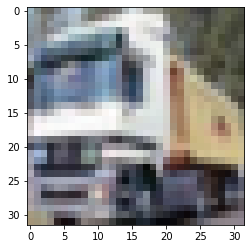

In [24]:

import matplotlib.pyplot as plt 
plt.imshow(x_train[1])
print("Class: ", y_train[1])

In [25]:
import numpy as np
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

**Building CNN model**

In [26]:
from tensorflow.keras import models
from tensorflow.keras import layers

model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), input_shape=(32,32,3), activation = "relu"))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(32, (3,3), activation = "relu"))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(64, (3,3), activation = "relu"))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(64, (3,3), activation = "relu"))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(128, (3,3), activation = "relu"))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Flatten())
model.add(layers.Dropout(0.2))
model.add(layers.Dense(512, activation="relu"))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(10, activation="softmax"))

In [27]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
batch_normalization_5 (Batch (None, 30, 30, 32)        128       
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 28, 28, 32)        9248      
_________________________________________________________________
batch_normalization_6 (Batch (None, 28, 28, 32)        128       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 12, 12, 64)        18496     
_________________________________________________________________
batch_normalization_7 (Batch (None, 12, 12, 64)       

In [28]:
from tensorflow.keras import optimizers

model.compile(loss="categorical_crossentropy",optimizer=optimizers.Adam(0.01),metrics=["accuracy"])

In [29]:
from tensorflow.keras.callbacks import EarlyStopping

es = EarlyStopping(monitor= "val_accuracy", patience = 7)

In [13]:
history = model.fit(partial_images, partial_labels, validation_data=(val_images,val_labels), epochs=60, callbacks=[es])

Epoch 1/60
1250/1250 [==============================] - 51s 17ms/step - loss: 1.7293 - accuracy: 0.3738 - val_loss: 1.6665 - val_accuracy: 0.3990
Epoch 2/60
1250/1250 [==============================] - 20s 16ms/step - loss: 1.3577 - accuracy: 0.5213 - val_loss: 1.1749 - val_accuracy: 0.5844
Epoch 3/60
1250/1250 [==============================] - 20s 16ms/step - loss: 1.1859 - accuracy: 0.5898 - val_loss: 1.0921 - val_accuracy: 0.6217
Epoch 4/60
1250/1250 [==============================] - 20s 16ms/step - loss: 1.0925 - accuracy: 0.6273 - val_loss: 1.0529 - val_accuracy: 0.6346
Epoch 5/60
1250/1250 [==============================] - 20s 16ms/step - loss: 1.0273 - accuracy: 0.6509 - val_loss: 1.0401 - val_accuracy: 0.6370
Epoch 6/60
1250/1250 [==============================] - 20s 16ms/step - loss: 0.9695 - accuracy: 0.6703 - val_loss: 1.0331 - val_accuracy: 0.6544
Epoch 7/60
1250/1250 [==============================] - 20s 16ms/step - loss: 0.9334 - accuracy: 0.6833 - val_loss: 1.0455 -

In [14]:
metrics = model.evaluate(test_images, test_labels)

313/313 [==============================] - 2s 6ms/step - loss: 0.9202 - accuracy: 0.7120


In [15]:
print("Loss: ", metrics[0])
print("Accuracy: ",metrics[1])

Loss:  0.9202441573143005
Accuracy:  0.7120000123977661
